In [9]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import yaml

config_file_path = "config/config_0000_BASE_seed_10.yaml"
with open(config_file_path, "r") as f:
    config = yaml.safe_load(f)

dataset_params = config["dataset_params"]
short_analysis_params = config["short_analysis_params"]
long_analysis_params = config["long_analysis_params"]

analysis_dir = os.path.join(dataset_params["root_dir"], dataset_params["run_num"], "analysis")
analysis_dir_train = os.path.join(analysis_dir, "train")
analysis_dir_truth = os.path.join(analysis_dir, "truth")
analysis_dir_emulate = os.path.join(analysis_dir, "emulate")

plt_save_dir = os.path.join(dataset_params["root_dir"], dataset_params["run_num"], "plots")
os.makedirs(plt_save_dir, exist_ok=True)

# Temporal Mean

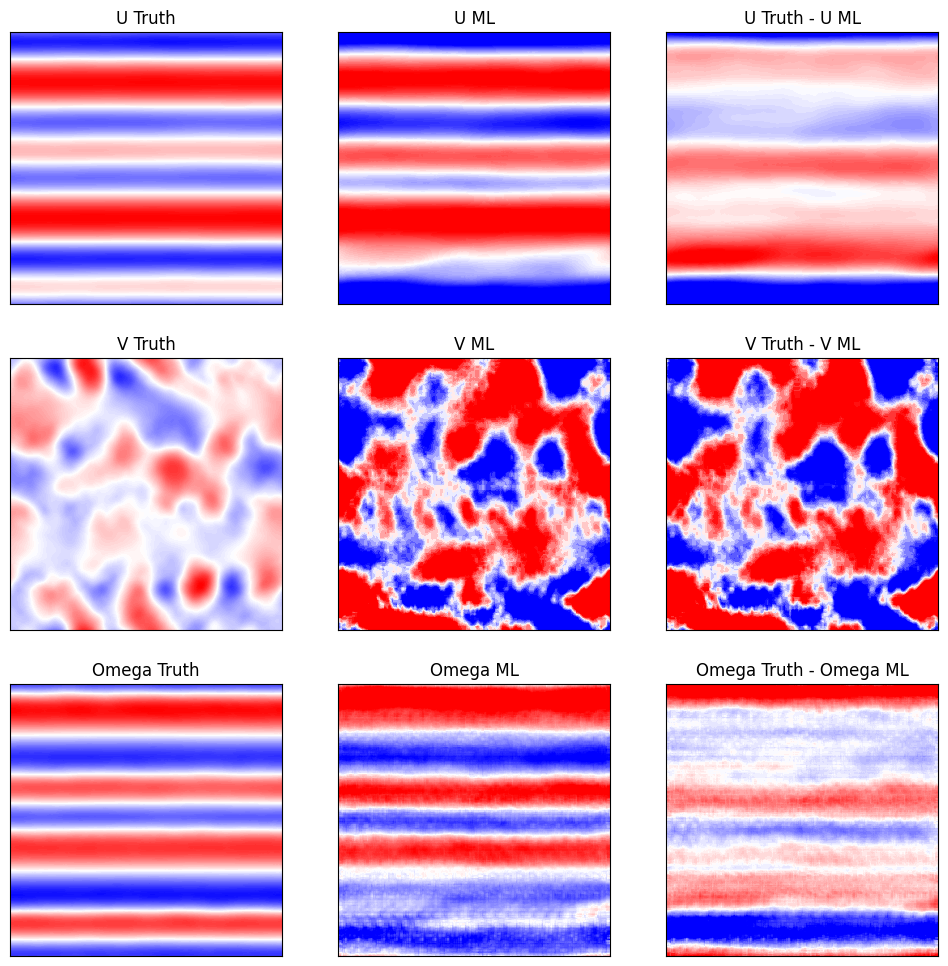

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
color = ['k', 'k']
marker = ['-', '--']
label = ["Truth", "ML"]

contourlevels = 100

data = np.load(analysis_dir_train + "/temporal_mean.npz")
# data = np.load(analysis_dir_truth + "/temporal_mean.npz")

U_train = data['U_mean']
V_train = data['V_mean']
Omega_train = data['Omega_mean']

data = np.load(analysis_dir_emulate + "/temporal_mean.npz")
U_emulate = data['U_mean']
V_emulate = data['V_mean']
Omega_emulate = data['Omega_mean']

vmax = np.max(U_train)
axes[0,0].contourf(U_train, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[0,0].set_title("U Truth")

axes[0,1].contourf(U_emulate, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[0,1].set_title("U ML")

axes[0,2].contourf(U_emulate - U_train, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[0,2].set_title("U Truth - U ML")

vmax = np.max(V_train)
axes[1,0].contourf(V_train, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[1,0].set_title("V Truth")

axes[1,1].contourf(V_emulate, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[1,1].set_title("V ML")

axes[1,2].contourf(V_emulate - V_train, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[1,2].set_title("V Truth - V ML")

vmax = np.max(Omega_train)
axes[2,0].contourf(Omega_train, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[2,0].set_title("Omega Truth")

axes[2,1].contourf(Omega_emulate, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[2,1].set_title("Omega ML")

axes[2,2].contourf(Omega_emulate - Omega_train, levels=contourlevels, cmap='bwr', vmax=vmax, vmin=-vmax)
axes[2,2].set_title("Omega Truth - Omega ML")

# Set aspect ratio to equal and remove labels for all axes
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(plt_save_dir + '/temporal_mean.png')


# Zonal Mean

<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2068738/3199889352.py:19: SyntaxWarning: invalid escape sequence '\o'
  axes[1].set_title(f'$\omega$ zonal mean')


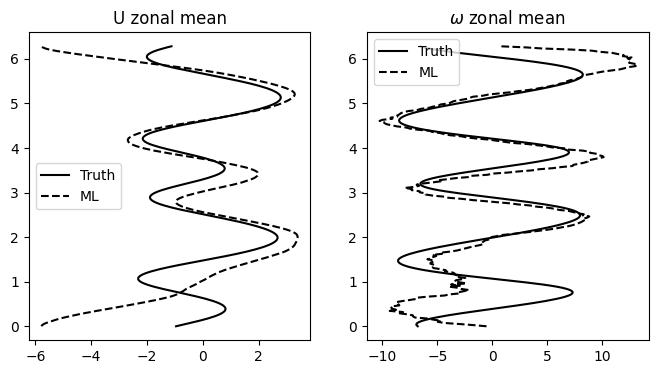

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
color = ['k', 'k']
marker = ['-', '--']
label = ["Truth", "ML"]

for i, analysis_dir_data in enumerate([analysis_dir_truth, analysis_dir_emulate]):

    data = np.load(analysis_dir_data + "/zonal_mean.npz")

    U_zonal = data['U_zonal_mean']
    Omega_zonal = data['Omega_zonal_mean']

    y = np.linspace(0, 2*np.pi, Omega_zonal.shape[0])

    axes[0].plot(U_zonal, y, color[i] + marker[i], label=label[i])
    axes[1].plot(Omega_zonal, y, color[i] + marker[i], label=label[i])

    axes[0].set_title(f'U zonal mean')
    axes[1].set_title(f'$\omega$ zonal mean')

axes[0].legend()
axes[1].legend()

plt.savefig(plt_save_dir + '/zonal_mean.png')



## EOF

<>:32: SyntaxWarning: invalid escape sequence '\o'
<>:32: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2068738/1567645264.py:32: SyntaxWarning: invalid escape sequence '\o'
  axes[1,count].set_title(f'EOF{count+1} $\omega$')


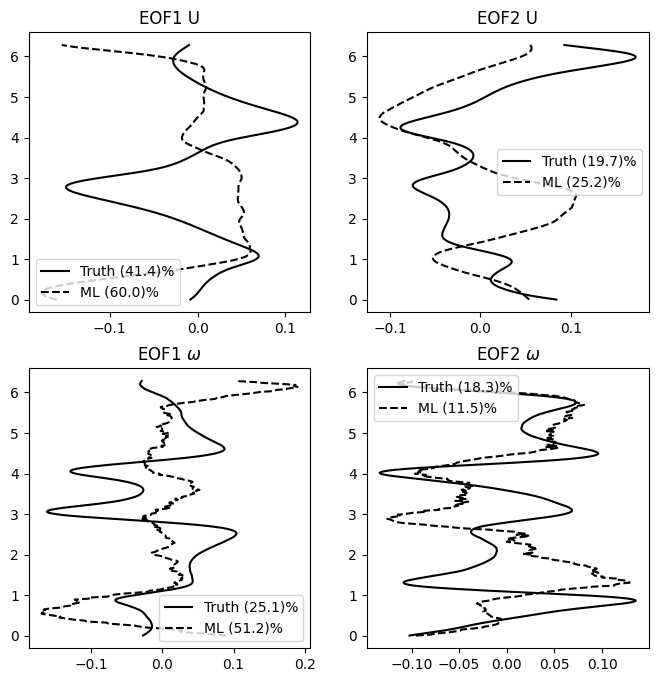

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
color = ['k', 'k']
marker = ['-', '--']
label = ["Truth ", "ML "]

# for i, analysis_dir_data in enumerate([analysis_dir_train, analysis_dir_emulate]):
for i, analysis_dir_data in enumerate([analysis_dir_train, analysis_dir_emulate]):

    data = np.load(analysis_dir_data + "/zonal_eof.npz")

    EOF_U = data["EOF_U"]
    PC_U = data["PC_U"]
    exp_var_U = data["exp_var_U"]

    EOF_Omega = data["EOF_Omega"]
    PC_Omega = data["PC_Omega"]
    exp_var_Omega = data["exp_var_Omega"]

    exp_var_U = (exp_var_U*100).round(1)
    exp_var_Omega = (exp_var_Omega*100).round(1)

    # if i == 1:
    #     EOF_U = -1*EOF_U

    y = np.linspace(0, 2*np.pi, EOF_Omega.shape[0])

    for count in range(2):
        axes[0,count].plot(EOF_U[:,count], y, color[i] + marker[i], label=label[i] + f'({exp_var_U[count]})%')
        axes[1,count].plot(EOF_Omega[:,count], y, color[i] + marker[i], label=label[i] + f'({exp_var_Omega[count]})%')

        axes[0,count].set_title(f'EOF{count+1} U')
        axes[1,count].set_title(f'EOF{count+1} $\omega$')

        axes[0,count].legend()
        axes[1,count].legend()

# axes[0,0].legend()
# axes[1,0].legend()

plt.savefig(plt_save_dir + '/zonal_EOFs.png')


# Divergence

<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_581811/275230525.py:12: SyntaxWarning: invalid escape sequence '\l'
  axes.set_title('$ \langle |\\nabla \cdot u |\\rangle$')


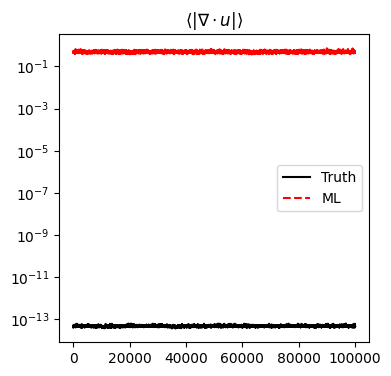

In [9]:
fig, axes = plt.subplots(1, figsize=(4, 4))
color = ['k', 'r']
marker = ['-', '--']
label = ["Truth", "ML"]

for i, analysis_dir_data in enumerate([analysis_dir_truth, analysis_dir_emulate]):

    div = np.load(analysis_dir_data + "/div.npy")

    axes.semilogy(div, color[i] + marker[i], label=label[i])

    axes.set_title('$ \langle |\\nabla \cdot u |\\rangle$')

axes.legend()

plt.savefig(plt_save_dir + '/div.png', dpi=600)


### Return Period

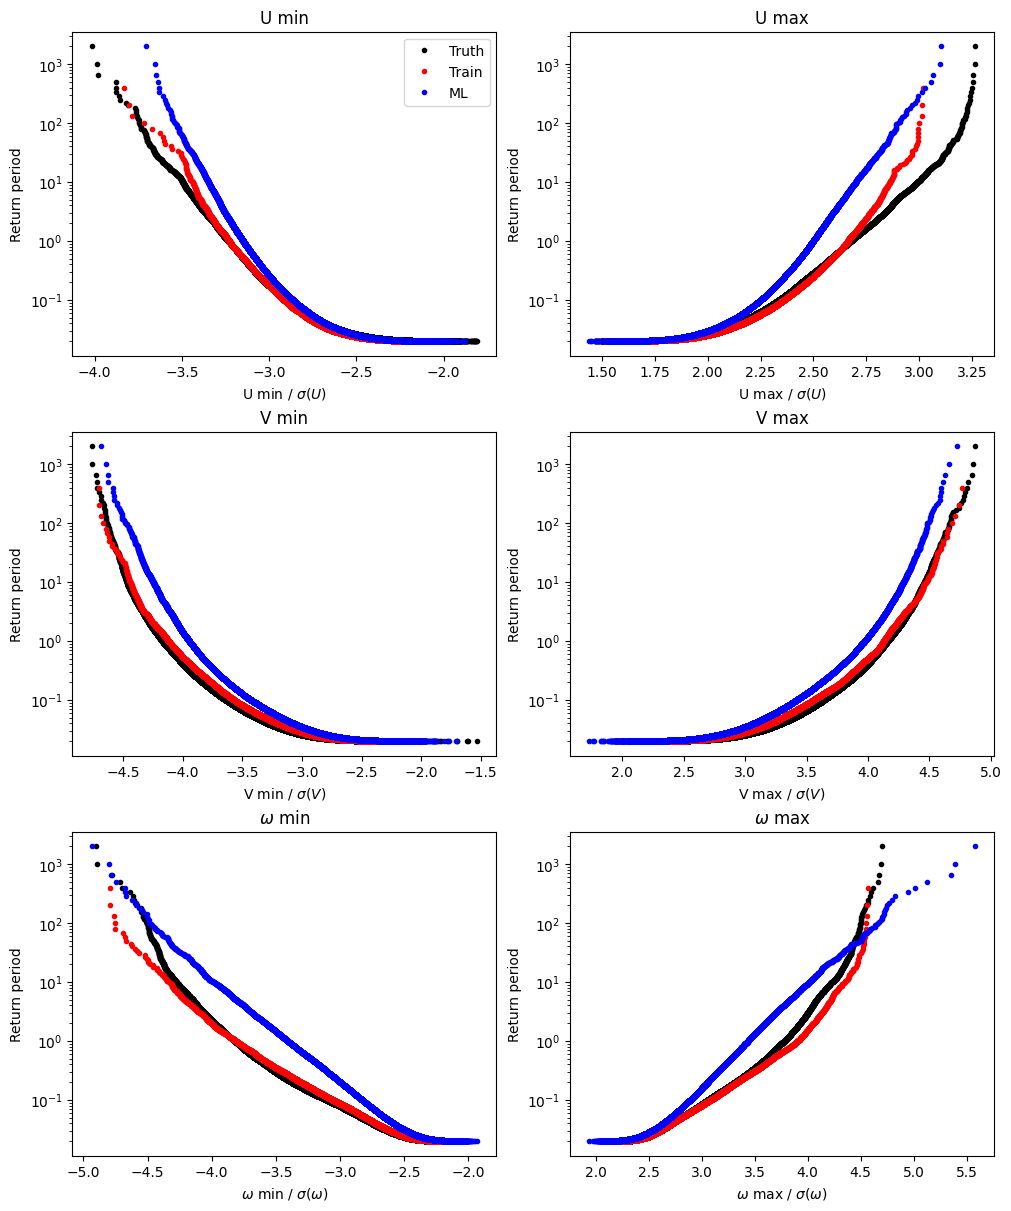

In [10]:
def empirical_return_period(X, dt=1):
    """Get empirical return period. Returns 'return_period' and 'data_amplitude';
    both are used to plot empirical return period."""

    # Empirical return period
    data_amplitude = np.sort(X)
    n = len(X)
    m = np.arange(1, n + 1)
    cdf_empirical = m / (n + 1)
    return_period = 1 / (1 - cdf_empirical)

    return return_period*dt, data_amplitude

dt = 0.02
markersize = 3
color = ['k', 'r', 'b']
U_std = 2.34
V_std = 1.88
Omega_std = 10.41

fig, axes = plt.subplots(3, 2, figsize=(10, 12), layout='constrained')

for i, analysis_dir_data in enumerate([analysis_dir_truth, analysis_dir_train, analysis_dir_emulate]):


    data = np.load(os.path.join(analysis_dir_data, "extremes.npz"))

    U_max = data["U_max"]/U_std
    V_max = data["V_max"]/V_std
    Omega_max = data["Omega_max"]/Omega_std

    U_min = data["U_min"]/U_std
    V_min = data["V_min"]/V_std
    Omega_min = data["Omega_min"]/Omega_std

    U_max_return_period, U_amplitude_max = empirical_return_period(U_max, dt=dt)
    V_max_return_period, V_amplitude_max = empirical_return_period(V_max, dt=dt)
    Omega_max_return_period, Omega_amplitude_max = empirical_return_period(Omega_max, dt=dt)

    U_min_return_period, U_amplitude_min = empirical_return_period(np.abs(U_min), dt=dt)
    V_min_return_period, V_amplitude_min = empirical_return_period(np.abs(V_min), dt=dt)
    Omega_min_return_period, Omega_amplitude_min = empirical_return_period(np.abs(Omega_min), dt=dt)


    axes[0,0].semilogy(-U_amplitude_min, U_min_return_period, 'o' + color[i],  markersize=markersize)
    axes[0,0].set_title('U min')
    axes[0,0].set_ylabel('Return period')
    axes[0,0].set_xlabel(rf'U min / $\sigma(U)$')

    axes[0,1].semilogy(U_amplitude_max, U_max_return_period, 'o' + color[i],  markersize=markersize)
    axes[0,1].set_title('U max')
    axes[0,1].set_ylabel('Return period')
    axes[0,1].set_xlabel(rf'U max / $\sigma(U)$')

    axes[1,0].semilogy(-V_amplitude_min, V_min_return_period, 'o' + color[i],  markersize=markersize)
    axes[1,0].set_title('V min')
    axes[1,0].set_ylabel('Return period')
    axes[1,0].set_xlabel(rf'V min / $\sigma(V)$')

    axes[1,1].semilogy(V_amplitude_max, V_max_return_period, 'o' + color[i],  markersize=markersize)
    axes[1,1].set_title('V max')
    axes[1,1].set_ylabel('Return period')
    axes[1,1].set_xlabel(rf'V max / $\sigma(V)$')

    axes[2,0].semilogy(-Omega_amplitude_min, Omega_min_return_period, 'o' + color[i],  markersize=markersize)
    axes[2,0].set_title(rf'$\omega$ min')
    axes[2,0].set_ylabel('Return period')
    axes[2,0].set_xlabel(rf'$\omega$ min / $\sigma(\omega)$')

    axes[2,1].semilogy(Omega_amplitude_max, Omega_max_return_period, 'o' + color[i],  markersize=markersize)
    axes[2,1].set_title(rf'$\omega$ max')
    axes[2,1].set_ylabel('Return period')
    axes[2,1].set_xlabel(rf'$\omega$ max / $\sigma(\omega)$')

axes[0,0].legend(['Truth', 'Train', 'ML'])


# PDF

FileNotFoundError: [Errno 2] No such file or directory: '/ocean/projects/atm170004p/jakhar/2d_emulator_vision/SSL-for-2D-Turbulence/results/BASE/ssl/analysis/train/pdf.npz'

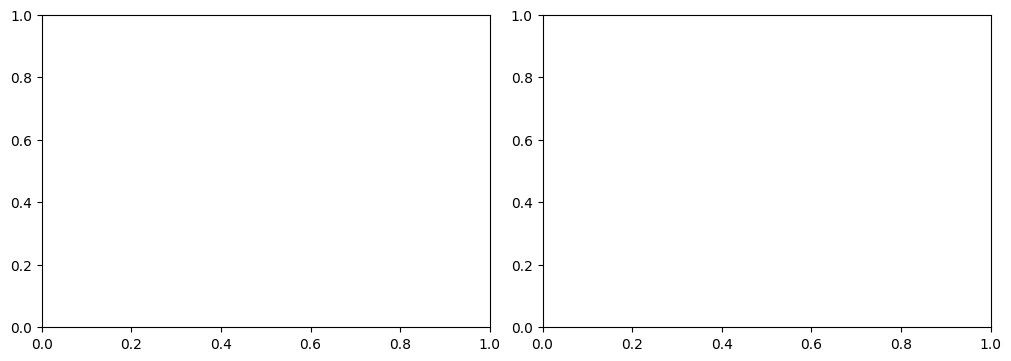

In [41]:


fig, axes = plt.subplots(1,2,figsize=(10, 3.5), layout="compressed")  # Adjust figure size as needed
color = ['k', 'k']
marker = ['-', '--']
label = ["Truth", "ML"]

for i, analysis_dir_data in enumerate([analysis_dir_train, analysis_dir_emulate]):

    data = np.load(analysis_dir_data + "/pdf.npz")

    U_pdf = data['U_pdf']
    U_bins = data['U_bins']
    U_std = data['U_std']
    Omega_pdf = data['Omega_pdf']
    Omega_bins = data['Omega_bins']
    Omega_std = data['Omega_std']

    axes[0].semilogy(U_bins/U_std, U_pdf, color[i] + marker[i], label=label[i])
    axes[1].semilogy(Omega_bins/Omega_std, Omega_pdf, color[i] + marker[i], label=label[i])

axes[0].set_title('$u$ PDF')
axes[1].set_title('$\omega$ PDF')

plt.legend()


for ax in axes.flatten():
    ax.set_xlabel('$k$')
    ax.set_ylim([1e-5, 1])
    ax.set_xlim([-4, 4])

axes[0].set_xlabel('$U/\sigma$')
axes[1].set_xlabel('$\omega/\sigma$')

plt.legend()

plt.savefig(plt_save_dir + '/pdf.png', dpi=600)
